In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
pdf = pd.read_csv("data/priority_privacy.csv")
pdf.head()

,platform,toggle_name,description,state,click_counts,category,url,image_path
0,Spotify,Google,Indicates that a Google account is currently l...,active,2,security_authentication,https://www.spotify.com/us/account/login-methods,../gemini-team/picasso/Spotify/Edit login meth...
1,Spotify,Email and Password,Allows adding a traditional email and password...,not added,2,security_authentication,https://www.spotify.com/us/account/login-methods,../gemini-team/picasso/Spotify/Edit login meth...
2,Spotify,Apple,Allows adding an Apple ID as a login method.,not added,2,security_authentication,https://www.spotify.com/us/account/login-methods,../gemini-team/picasso/Spotify/Edit login meth...
3,Spotify,Close account,A confirmation checkbox to acknowledge that cl...,enabled,5,data_collection_tracking,https://www.spotify.com/us/account/close,../gemini-team/picasso/Spotify/Close account_h...
4,Spotify,Process my personal data for tailored ads,The toggle controls the tailored ads you exper...,enabled,1,data_collection_tracking,https://www.spotify.com/us/account/privacy,../gemini-team/picasso/Spotify/Account privacy...


In [15]:
pdf.isnull().sum()

platform        0
toggle_name     0
description     0
state           0
click_counts    0
category        0
url             0
image_path      0
dtype: int64

In [ ]:
pdf.groupby('platform')['click_counts'].describe() # box plot might be helpful to visualize this info

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
Facebook,91.0,3.505495,1.887818,1.0,2.0,3.0,6.0,10.0
LinkedIn,321.0,1.676012,0.525313,1.0,1.0,2.0,2.0,5.0
Reddit,51.0,0.549020,0.878948,0.0,0.0,0.0,1.0,5.0
Spotify,49.0,1.183673,0.634871,1.0,1.0,1.0,1.0,5.0
TwitterX,113.0,1.053097,0.261886,1.0,1.0,1.0,1.0,3.0


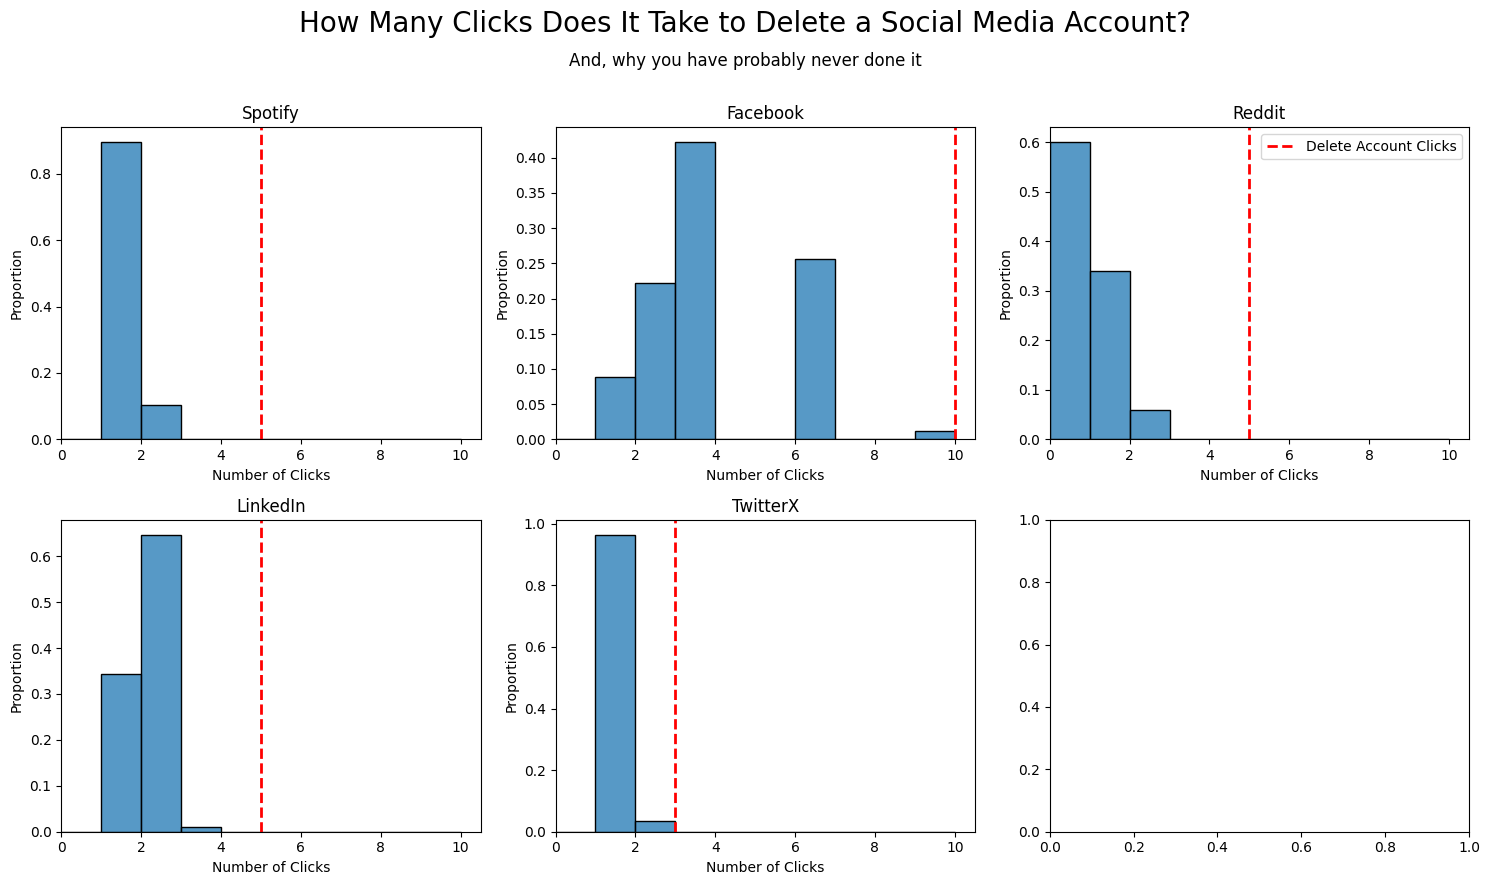

In [89]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Flatten axes for easy iteration
axes = axes.flatten()

dict_ = {
    'Spotify': 3,
    'Facebook': 61,
    'Reddit': 147,
    'LinkedIn': 624,
    'TwitterX': 202
}

for ax, col in zip(axes, dict_.keys()):
    plat_ = col
    index_ = dict_[col]
    delete_stat = pdf.iloc[dict_[col]]['click_counts']

    data = pdf[pdf['platform'] == plat_]['click_counts'].drop([index_])
    bins_ = np.arange(0, 11, 1)

    sns.histplot(data, stat = 'probability', ax = ax, bins = bins_)

    ax.axvline(delete_stat, color="red", linestyle="--", linewidth=2, label = 'Delete Account Clicks')

    ax.set_xlim(left=0)
    ax.set_title(f"{col}")
    ax.set_xlabel('Number of Clicks')
    ax.set_ylabel('Proportion')

axes[2].legend()
plt.tight_layout()
fig.suptitle("How Many Clicks Does It Take to Delete a Social Media Account?", fontsize=20, y=1.1)
fig.text(0.5, 1.03,
         "And, why you have probably never done it",
         ha="center", fontsize=12)
plt.show();

In [ ]:
# the number of clicks for a user to delete their account (this is a statement piece, just need to figure out the right way to do it)
    # when do users typically give up or lose patience? (may have to refer to other studies/research)
# did you know that linkedin a generative ai toggle for your data usage (hook + interesting surprise)
# find another interesting setting people likely don't know about
# a lot of advertisement settings
# how many advertisement related settings are there? (too many)
# look into category distributions (might be interesting, don't know what to expect tbh)